##Assignment on Classification
IRIS Dataset

In [189]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
# load iris dataset
iris=pd.read_excel('/content/iris.xls')

In [191]:
iris.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [192]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [193]:
iris.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [194]:
iris.skew()

<ipython-input-194-21487a0f66e5>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.skew()


SL    0.306823
SW    0.377818
PL   -0.268905
PW   -0.104997
dtype: float64

In [195]:
# check for missing values
iris.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

Fill missing values with median

In [196]:
iris['PL']=iris['PL'].fillna(iris['PL'].median())

In [197]:
iris['SL']=iris['SL'].fillna(iris['SL'].median())
iris['SW']=iris['SW'].fillna(iris['SW'].median())

In [198]:
iris.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

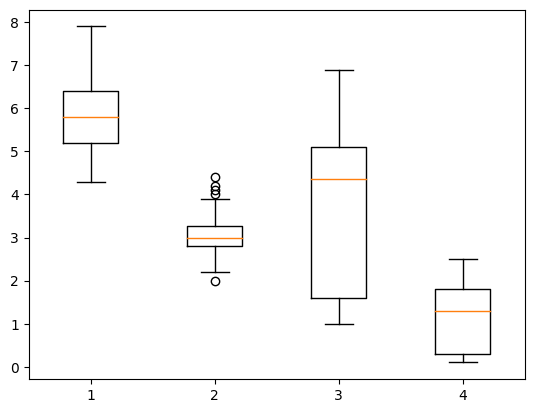

In [199]:
# using boxplot to view the outliers if any
plt.boxplot(iris[['SL','SW','PL','PW']])
plt.show()

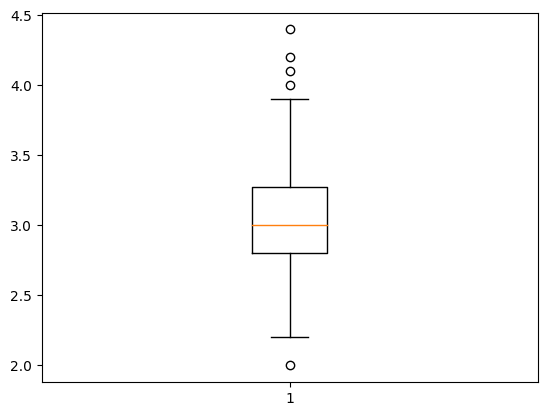

In [200]:
plt.boxplot(iris['SW'])
plt.show()

since there are outliers in 'SW' , handling the outliers using IQR method

In [201]:
q1=np.percentile(iris['SW'],25,method='midpoint')
q2=np.percentile(iris['SW'],50,method='midpoint')
q3=np.percentile(iris['SW'],75,method='midpoint')

In [202]:
print(q1,q2,q3)

2.8 3.0 3.25


In [203]:
IQR=q3-q1

In [204]:
low_lim=q1-1.5*IQR
up_lim=q3+1.5*IQR

In [205]:
outliers=[]
for x in iris['SW']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [206]:
iris['SW']=iris['SW'].clip(lower=low_lim,upper=up_lim)

In [207]:
outliers=[]
for x in iris['SW']:
  if ((x<low_lim) or (x>up_lim)):
   outliers.append(x)

print(outliers)

[]


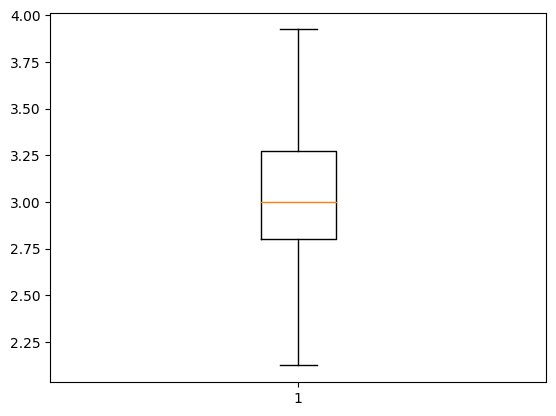

In [208]:
plt.boxplot(iris['SW'])
plt.show()

In [209]:
num_columns=iris[['SL','SW','PL','PW']]
num_columns

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [210]:
num_columns.corr()

,SL,SW,PL,PW
SL,1.000000,-0.100056,0.830554,0.800939
SW,-0.100056,1.000000,-0.402621,-0.335121
PL,0.830554,-0.402621,1.000000,0.936089
PW,0.800939,-0.335121,0.936089,1.000000


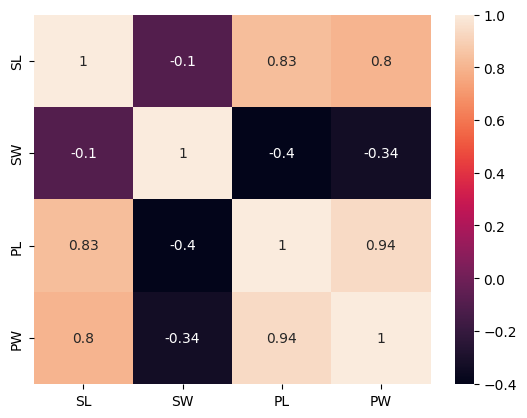

In [211]:
# heatmap shows the correlation between the variables
dataplot=sns.heatmap(num_columns.corr(),annot=True)
plt.show()

high correlation between Petal Width and Petal Length
and also between Petal Length and Sepal Length

In [212]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,Iris-setosa
1,4.9,3.0,1.40,0.2,Iris-setosa
2,5.8,3.2,1.30,0.2,Iris-setosa
3,4.6,3.1,1.50,0.2,Iris-setosa
4,5.0,3.6,1.40,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,Iris-virginica
146,6.3,2.5,5.00,1.9,Iris-virginica
147,6.5,3.0,4.35,2.0,Iris-virginica
148,6.2,3.4,5.40,2.3,Iris-virginica


Label Encoding for the Classification- Target variable

In [213]:
from sklearn.preprocessing import LabelEncoder

In [214]:
le=LabelEncoder()

In [215]:
iris['Classification']=le.fit_transform(iris['Classification'])

In [216]:
iris

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


Feature Scaling and assign to X

In [217]:
X=iris[['SL','SW','PL','PW']]

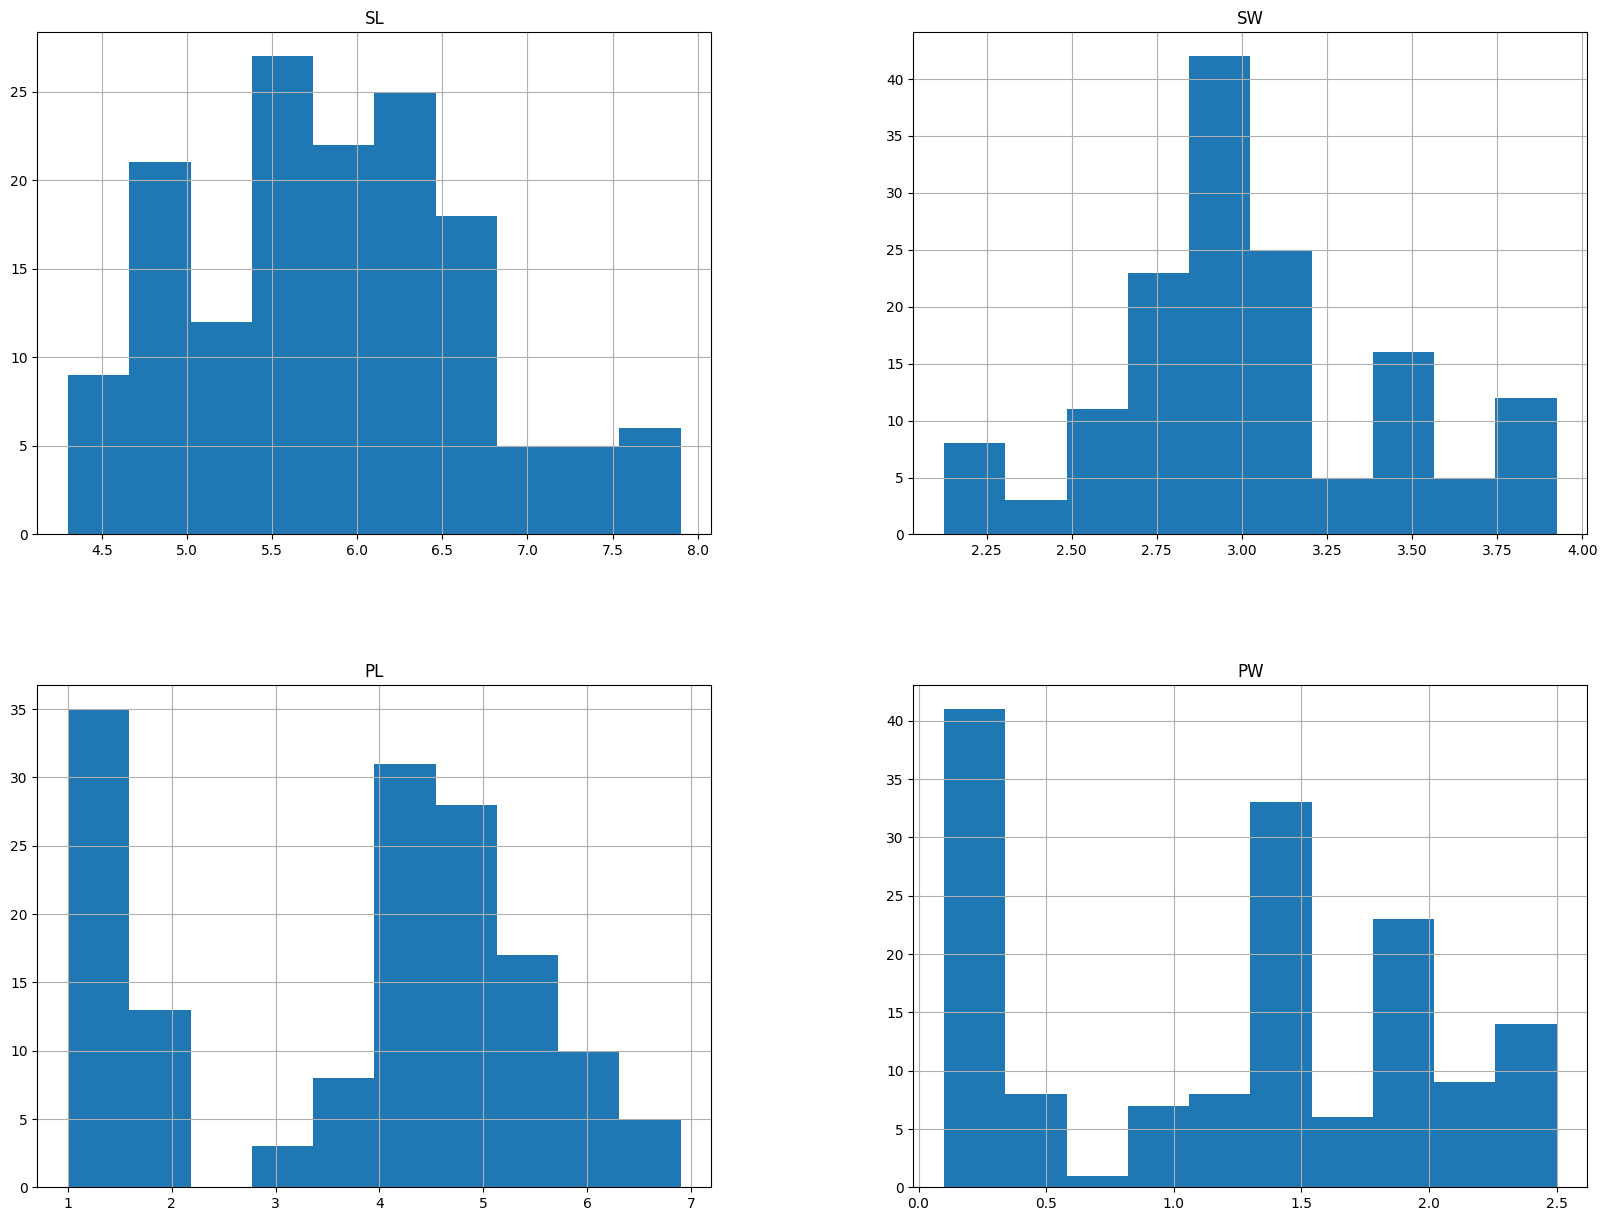

In [218]:
X.hist(figsize=(20,15))
plt.show()

In [219]:
# import for Scaling
from sklearn.preprocessing import StandardScaler

In [220]:
sc=StandardScaler()

In [221]:
X_sc=sc.fit_transform(X)

In [222]:
X_sc=pd.DataFrame(X_sc)

In [223]:
X_sc

,0,1,2,3
0,-0.934811,1.141745,-1.380791,-1.312977
1,-1.182990,-0.103342,-1.380791,-1.312977
2,-0.066181,0.394692,-1.438808,-1.312977
3,-1.555260,0.145675,-1.322775,-1.312977
4,-1.058900,1.390762,-1.380791,-1.312977
...,...,...,...,...
145,1.050628,-0.103342,0.823834,1.447956
146,0.554268,-1.348429,0.707801,0.922064
147,0.802448,-0.103342,0.330694,1.053537
148,0.430178,0.892727,0.939866,1.447956


In [233]:
y=iris.drop(['SL','SW','PL','PW'],axis=1)

In [234]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [235]:
X_sc

,0,1,2,3
0,-0.934811,1.141745,-1.380791,-1.312977
1,-1.182990,-0.103342,-1.380791,-1.312977
2,-0.066181,0.394692,-1.438808,-1.312977
3,-1.555260,0.145675,-1.322775,-1.312977
4,-1.058900,1.390762,-1.380791,-1.312977
...,...,...,...,...
145,1.050628,-0.103342,0.823834,1.447956
146,0.554268,-1.348429,0.707801,0.922064
147,0.802448,-0.103342,0.330694,1.053537
148,0.430178,0.892727,0.939866,1.447956


Model Evaluation

In [236]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,random_state=42,test_size=0.20)

using Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [238]:
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [239]:
log_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [240]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [241]:
confusion_matrix(y_test,log_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [242]:
print('Accuracy:',accuracy_score(y_test,log_pred))
print('Precision:',precision_score(y_test,log_pred,average='macro'))
print('Recall:',recall_score(y_test,log_pred,average='macro'))
print('F1:',f1_score(y_test,log_pred,average='macro'))

Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1: 0.9658994032395567


using kNN model

In [249]:
from sklearn.neighbors import KNeighborsClassifier


In [251]:
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
knn_pred=classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [253]:
confusion_matrix(y_test,knn_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

In [255]:
print('Accuracy:',accuracy_score(y_test,knn_pred))
print('Precision:',precision_score(y_test,knn_pred,average='macro'))
print('Recall:',recall_score(y_test,knn_pred,average='macro'))
print('F1:',f1_score(y_test,knn_pred,average='macro'))

Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1: 0.9658994032395567


using SVM model

In [256]:
from sklearn.svm import SVC
sv_clf=SVC()
sv_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [257]:
y_pred=sv_clf.predict(X_test)

In [258]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [259]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [260]:
sv_clf=SVC(kernel='poly')
sv_clf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [261]:
y_pred=sv_clf.predict(X_test)

In [262]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9333333333333333


In [263]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


Decision Tree

In [264]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)

In [265]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [266]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

<ipython-input-267-4d8e84b2ff70>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


RandomForestClassifier()

In [268]:
y_pred=rf_clf.predict(X_test)

In [269]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [270]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [271]:
rf_clf=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=4)
rf_clf.fit(X_train,y_train)

<ipython-input-271-24481a98048a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=4,
                       n_estimators=20)

In [272]:
y_pred=rf_clf.predict(X_test)

In [273]:
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 1.0


In [274]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Decision Tree and Random Forest Classifiers have given an accuracy of 1 and reasonable result in confusion matrix

# while the rest have shown accuracy in the range of 0.93-0.96